Reference:
Forecasting: Principles and Practice by Rob J Hyndman and George Athanasopoulos

Terms to Know:
Explanatory model: Is a model that adds variables into our model not only based on past historical prices (in this case Avocados prices), but uses other variables to make accurate predictions.

Time Series Model: is a model that only uses past information (in this case past avocado prices) to make accurate predictions.
Steps for our Forecasting Project:

Determine what is the problem: In this case we want to have accurate forecast of Avocado prices.
Gathering Information: Understand what was the process that was used to gather the information and if the information is sufficient to have effective predictive models.

Implementing Exploratory Analysis: Determine if there are any sort of patterns in our data before going into building the models.

Choosing predictive models: This is the phase were we decide which model is the most appropiate to make our forecasting most effective.

Testing our model: Analyze if our model is effective enough to make effective predictions.

Exploratory Data Analysis:
In this phase of the project we will concentrate mainly on two aspects of the time series forecasting analysis hich consists of:

Seasonal Patterns: In this section we will focus on constant patterns that occur frequently from year to year and from month to month in both types of avocados conventional and organic.

Cyclical Patterns: This section will require me to search deeper into what factors could have affected the price of avocados during those years (low supply, storms etc.) and will be interesting to see if any of those factors contributed to any significant price changes.

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/4b4552acae92b71b390feed74695315b90151935/avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop('Unnamed: 0', axis = 1)

In [5]:
df.Date.count()

1517

In [6]:
df.AveragePrice.describe()


count    1517.000000
mean        1.074990
std         0.188891
min         0.490000
25%         0.980000
50%         1.080000
75%         1.190000
max         1.680000
Name: AveragePrice, dtype: float64

<AxesSubplot:>

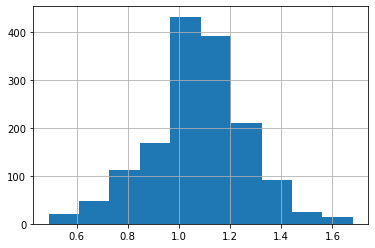

In [7]:
df.AveragePrice.hist()


In [8]:
df['Total Volume'].describe()


count    1.517000e+03
mean     1.601879e+06
std      4.433143e+06
min      3.875074e+04
25%      1.474700e+05
50%      4.027919e+05
75%      9.819751e+05
max      4.465546e+07
Name: Total Volume, dtype: float64

<AxesSubplot:>

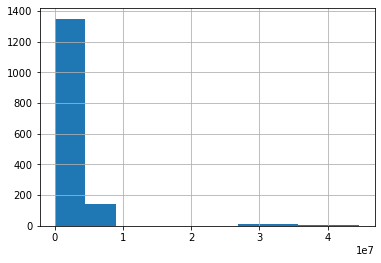

In [9]:
df['Total Volume'].hist()


In [10]:
df['4046'].describe()


count    1.517000e+03
mean     6.464387e+05
std      1.947614e+06
min      4.677200e+02
25%      2.040034e+04
50%      8.175117e+04
75%      3.775785e+05
max      1.893304e+07
Name: 4046, dtype: float64

In [11]:
df['XLarge Bags'].describe()


count      1517.000000
mean       2181.771074
std        7455.712144
min           0.000000
25%           0.000000
50%           0.000000
75%         401.480000
max      108072.790000
Name: XLarge Bags, dtype: float64

<AxesSubplot:>

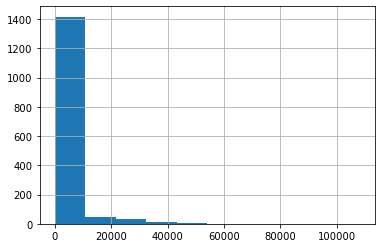

In [12]:
df['XLarge Bags'].hist()


In [13]:
df.type.value_counts()


conventional    1517
Name: type, dtype: int64

In [14]:
df.region.value_counts()


California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

In [15]:
df.year.value_counts()


2015.0    1270
2016.0     247
Name: year, dtype: int64

In [16]:
df.columns


Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [17]:
df = df.rename(columns = {'Total Volume' : 'totalVolume', '4046' : 'PLU4046', '4225' : 'PLU4225', '4770' : 'PLU4770', 'Total Bags' : 'totalBags', \
          'Small Bags' : 'smallBags', 'Large Bags' : 'largeBags', 'XLarge Bags' : 'xLargeBags', 'Date' : 'date', 'AveragePrice' : 'averagePrice'})

In [18]:
df.head()


,date,averagePrice,totalVolume,PLU4046,PLU4225,PLU4770,totalBags,smallBags,largeBags,xLargeBags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [19]:
from sklearn.preprocessing import MinMaxScaler


In [20]:
scalerMinMax = MinMaxScaler()


In [21]:
df.columns[2:10]


Index(['totalVolume', 'PLU4046', 'PLU4225', 'PLU4770', 'totalBags',
       'smallBags', 'largeBags', 'xLargeBags'],
      dtype='object')

In [22]:
     scalerMinMax.fit(df[df.columns[2:10]])


MinMaxScaler()

In [23]:
scalerMinMax.min_


array([-8.68525253e-04, -2.47045167e-05, -9.41070225e-05,  0.00000000e+00,
       -4.91871944e-04, -5.62238453e-04,  0.00000000e+00,  0.00000000e+00])

In [24]:
scalerMinMax.scale_


array([2.24131269e-08, 5.28190300e-08, 5.27573748e-08, 7.23842446e-07,
       1.48522375e-07, 1.69769777e-07, 8.91999812e-07, 9.25302289e-06])

In [25]:
scalerMinMax.data_min_


array([38750.74,   467.72,  1783.77,     0.  ,  3311.77,  3311.77,
           0.  ,     0.  ])

In [26]:
scalerMinMax.data_max_


array([44655461.51, 18933038.04, 18956479.74,  1381516.11,  6736304.04,
        5893641.72,  1121076.47,   108072.79])

In [27]:
scalerMinMax.data_range_


array([44616710.77, 18932570.32, 18954695.97,  1381516.11,  6732992.27,
        5890329.95,  1121076.47,   108072.79])

Relationship between Prices and Total Volume:

In this phase we will analyze the impact supply has on the price of avocados as a whole. Normally, there is an inverse relationship between supply and prices. When there is an overproduction of avocados they will have a negative impact on the market price of avocados. Let's see if this is the case for both conventional and organic avocados.
Conventional: At the end of 2017 we can see a large drop in prices, at the same time there is an increasing amount of volume of avocados in the market.

Organic: Same happens with organic avocados, at the end of 2017 there is a big drop and we can see a huge increase in volume.
Volume peaks: Notice how each volume peak is a signal for an upcoming drop in avocado prices.

In [28]:
df[df.columns[2:10]] = scalerMinMax.transform(df[df.columns[2:10]])


In [29]:
df.head()


,date,averagePrice,totalVolume,PLU4046,PLU4225,PLU4770,totalBags,smallBags,largeBags,xLargeBags,type,year,region
0,27-12-2015,1.33,0.000571,0.000030,0.002779,0.000035,0.000800,0.000898,0.000083,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,0.000361,0.000011,0.002261,0.000042,0.000920,0.001035,0.000087,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,0.001781,0.000017,0.005664,0.000094,0.000718,0.000803,0.000092,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,0.000902,0.000035,0.003703,0.000053,0.000371,0.000402,0.000119,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,0.000275,0.000025,0.002219,0.000055,0.000427,0.000454,0.000176,0.0,conventional,2015.0,Albany


In [30]:
df['type'] = df.type.astype('category')


In [31]:
df = df.drop('year', axis = 1)


In [32]:
df['type'].cat.categories


Index(['conventional'], dtype='object')

In [33]:
df['type'] = df.type.cat.codes


In [34]:
df['region'] = df.region.astype('category')


In [35]:
df.region.cat.categories


Index(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago', 'Columbus',
       'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids', 'GreatLakes',
       'HarrisburgScranton', 'HartfordSpringfield', 'Houston', 'Indianapolis',
       'Jacksonville', 'LasVegas', 'LosAngeles', 'Louisville',
       'MiamiFtLauderdale', 'Midsouth', 'Nashville', 'NewYork', 'Northeast',
       'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson',
       'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro',
       'RichmondNorfolk', 'Roanoke', 'SanDiego', 'SanFrancisco', 'Seattle',
       'SouthCarolina', 'SouthCentral', 'Southeast', 'Spokane', 'StLouis',
       'Syracuse', 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'],
      dtype='object')

In [36]:
df['region'] = df.region.cat.codes


In [37]:
df['date'] = pd.to_datetime(df.date)


In [38]:
df.dtypes


date            datetime64[ns]
averagePrice           float64
totalVolume            float64
PLU4046                float64
PLU4225                float64
PLU4770                float64
totalBags              float64
smallBags              float64
largeBags              float64
xLargeBags             float64
type                      int8
region                    int8
dtype: object

In [39]:
df.date.min()


Timestamp('2015-01-02 00:00:00')

In [40]:
df.date.max()


Timestamp('2016-12-25 00:00:00')

In [41]:
df.date.count()


1517

In [42]:
df.date.nunique()


104

In [43]:
df['dayOfWeek'] = df.date.dt.dayofweek


In [44]:
df['month'] = df.date.dt.month 


In [45]:
df['firstPartOfMonth'] = df.date.dt.day <= 10


In [46]:
df['secondPartOfMonth'] = ((df.date.dt.day > 10) & (df.date.dt.day <= 20))


In [47]:
df['thirdPartOfMonth'] = df.date.dt.day > 20


In [48]:
df['day'] = df.date.dt.day


In [49]:
df.head()


,date,averagePrice,totalVolume,PLU4046,PLU4225,PLU4770,totalBags,smallBags,largeBags,xLargeBags,type,region,dayOfWeek,month,firstPartOfMonth,secondPartOfMonth,thirdPartOfMonth,day
0,2015-12-27,1.33,0.000571,0.000030,0.002779,0.000035,0.000800,0.000898,0.000083,0.0,0,0,6.0,12.0,False,False,True,27.0
1,2015-12-20,1.35,0.000361,0.000011,0.002261,0.000042,0.000920,0.001035,0.000087,0.0,0,0,6.0,12.0,False,True,False,20.0
2,2015-12-13,0.93,0.001781,0.000017,0.005664,0.000094,0.000718,0.000803,0.000092,0.0,0,0,6.0,12.0,False,True,False,13.0
3,2015-06-12,1.08,0.000902,0.000035,0.003703,0.000053,0.000371,0.000402,0.000119,0.0,0,0,4.0,6.0,False,True,False,12.0
4,2015-11-29,1.28,0.000275,0.000025,0.002219,0.000055,0.000427,0.000454,0.000176,0.0,0,0,6.0,11.0,False,False,True,29.0


In [50]:
df.firstPartOfMonth.astype('int')


0        0
1        0
2        0
3        0
4        0
        ..
16463    0
16464    0
16465    0
16466    0
16467    0
Name: firstPartOfMonth, Length: 16468, dtype: int32

In [51]:
df['firstPartOfMonth'] = df.firstPartOfMonth.astype('int')


In [52]:
df['secondPartOfMonth'] = df.secondPartOfMonth.astype('int')


In [53]:
df['thirdPartOfMonth'] = df.thirdPartOfMonth.astype('int')


In [54]:
df.head()


,date,averagePrice,totalVolume,PLU4046,PLU4225,PLU4770,totalBags,smallBags,largeBags,xLargeBags,type,region,dayOfWeek,month,firstPartOfMonth,secondPartOfMonth,thirdPartOfMonth,day
0,2015-12-27,1.33,0.000571,0.000030,0.002779,0.000035,0.000800,0.000898,0.000083,0.0,0,0,6.0,12.0,0,0,1,27.0
1,2015-12-20,1.35,0.000361,0.000011,0.002261,0.000042,0.000920,0.001035,0.000087,0.0,0,0,6.0,12.0,0,1,0,20.0
2,2015-12-13,0.93,0.001781,0.000017,0.005664,0.000094,0.000718,0.000803,0.000092,0.0,0,0,6.0,12.0,0,1,0,13.0
3,2015-06-12,1.08,0.000902,0.000035,0.003703,0.000053,0.000371,0.000402,0.000119,0.0,0,0,4.0,6.0,0,1,0,12.0
4,2015-11-29,1.28,0.000275,0.000025,0.002219,0.000055,0.000427,0.000454,0.000176,0.0,0,0,6.0,11.0,0,0,1,29.0


In [55]:
df = df.drop('date', axis = 1)


In [56]:
df.corr()


,averagePrice,totalVolume,PLU4046,PLU4225,PLU4770,totalBags,smallBags,largeBags,xLargeBags,type,region,dayOfWeek,month,firstPartOfMonth,secondPartOfMonth,thirdPartOfMonth,day
averagePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,-0.229408,0.059500,0.060642,-0.080652,0.030859,0.051206,0.092589
totalVolume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,0.236579,-0.019227,-0.055212,0.040342,-0.032063,-0.009107,-0.034857
PLU4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,0.269481,-0.023587,-0.053007,0.040845,-0.034684,-0.007016,-0.031806
PLU4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,0.215733,-0.019182,-0.058429,0.046506,-0.032473,-0.014956,-0.044008
PLU4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.138092,-0.016683,-0.055079,0.029310,-0.026112,-0.003822,-0.021318
totalBags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.190001,-0.006482,-0.047747,0.023023,-0.021989,-0.001534,-0.021137
smallBags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.168650,-0.003972,-0.048978,0.019905,-0.023138,0.002770,-0.016462
largeBags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,0.297452,-0.021015,-0.039242,0.039593,-0.014773,-0.025511,-0.046578
xLargeBags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,-0.046144,0.019216,0.021452,-0.015788,0.008161,0.007919,0.019315
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.795191,NaN,NaN,0.573042,0.547451,0.555523,NaN


Exploratory Analysis and Visualization
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Instructions (delete this cell)

Compute the mean, sum, range and other interesting statistics for numeric columns
Explore distributions of numeric columns using histograms etc.
Explore relationship between columns using scatter plots, bar charts etc.
Make a note of interesting insights from the exploratory analysis

In [57]:
from sklearn.model_selection import train_test_split


In [58]:
df.averagePrice.count()


1517

<AxesSubplot:>

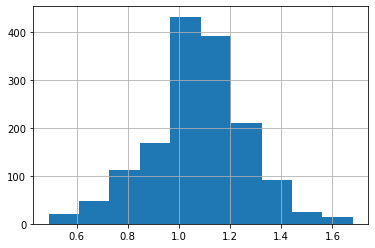

In [59]:
df.averagePrice.hist()


In [60]:
df.averagePrice.describe()


count    1517.000000
mean        1.074990
std         0.188891
min         0.490000
25%         0.980000
50%         1.080000
75%         1.190000
max         1.680000
Name: averagePrice, dtype: float64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('averagePrice', axis = 1), df.averagePrice, test_size = 5000, random_state = 42)


In [62]:
y_train.describe()


count    1059.000000
mean        1.068499
std         0.182774
min         0.490000
25%         0.980000
50%         1.070000
75%         1.180000
max         1.620000
Name: averagePrice, dtype: float64

<AxesSubplot:>

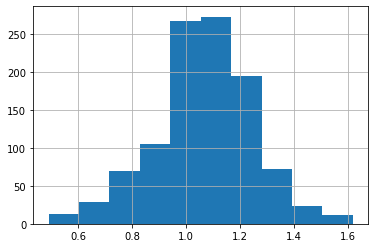

In [63]:
y_train.hist()


In [64]:
y_test.describe()


count    458.000000
mean       1.090000
std        0.201739
min        0.510000
25%        0.972500
50%        1.100000
75%        1.210000
max        1.680000
Name: averagePrice, dtype: float64

<AxesSubplot:>

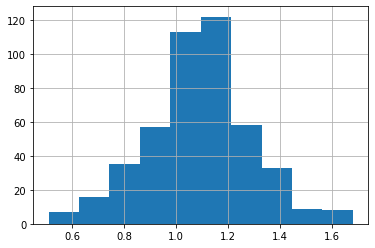

In [65]:
y_test.hist()


In [66]:
from sklearn.model_selection import RandomizedSearchCV


In [67]:
params = {
    'base_estimator__max_depth' : [None, 5, 8, 10, 12, 15, 20, 25],\
    'base_estimator__max_features' : [None, 'log2', 'auto', 'sqrt'],\
    'base_estimator__max_leaf_nodes' : [None, 2, 4, 6, 8, 10, 15],\
    'n_estimators' : [25, 50, 75, 100, 150, 250],\
    'loss' : ['linear', 'square', 'exponential']
}

In [68]:
from sklearn.metrics import SCORERS


In [69]:
SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

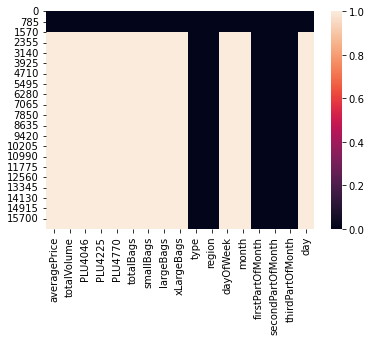

In [76]:
sns.heatmap(df.isnull())

Above I am checking the null values, as find there are no null values in the data set because the red color is distributed equally correspond to each column.

Observation

In our dataset there is unnamed column which I renamed to IndexNo column with values ranging from 0 to 51. This might denote the species of avocadoes perhaps as each unique value is recurrent for a number of times on diferent dates. The plot is not normaly distributed.

The Avrg_Price per avocado assumes a normal distribution; the fair price ranging from 1 to 1.xx dolars.

The total volume of avocados sold, or the volume sold per PLU number and the number of bagstypes used varies greatly assuming not normally distributed curve, so many values approaching zero.

Avocado sales on each year assumes a normal distribution ata the year start and the curve turns down at every mid of the year. This tells that avocados are sold or are in season at every first half of the year. Also sales droped year 2018 compared to previous 3 years